Unit 11, Lecture 4
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, April 16 2016

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import seaborn
seaborn.set_context("notebook")
seaborn.set_style("whitegrid")
import scipy.stats

Plotting with Error Bars
===

Error bars are little lines that go up and down or left and right in graphs to indicate the standard error of a measurement. They may also indicate a confidence interval or standard deviation, however that will usually be specified in the figure caption. The code to make error bar plots is shown below with a constant y-error bar. 

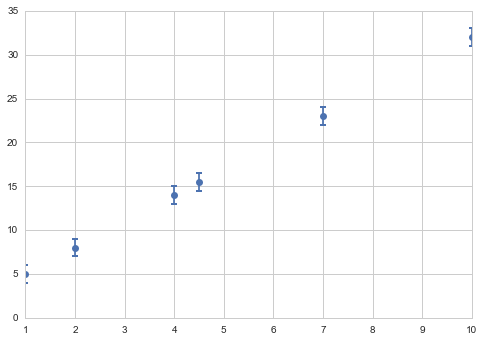

In [4]:
x = np.array([1,2,4,4.5,7,10])
y = 3 * x + 2

#yerr=1 means constant standard error up and down of 1
#fmt is for lines/points and color. capthick is necessary to make the small dashes at the top and bottom
plt.errorbar(x,y, yerr=1, fmt='o', capthick=2) 
plt.show()

Somtimes you have x-error and y-error. You can do that too:

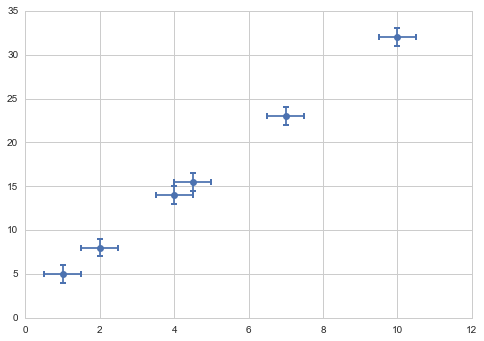

In [5]:
plt.errorbar(x,y, yerr=1, xerr=0.5, fmt='o', capthick=2) 
plt.show()

You may have a different error value at each point. Then you pass an array instead:

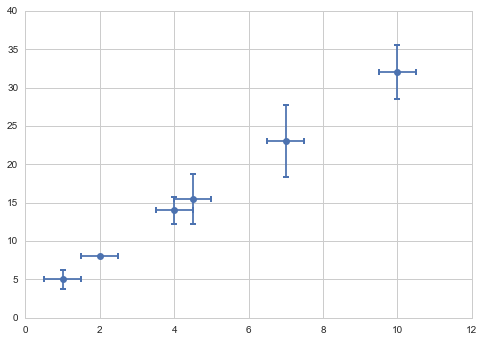

In [6]:
#create some random numbers to use for my error bars
#squre them to make sure they're positive
yerror = 5*np.random.random(size=len(x))**2

plt.errorbar(x,y, yerr=yerror, xerr=0.5, fmt='o', capthick=2) 
plt.show()

If you do quantiling or some other technique that is non-parametric, you often can have error bars that are asymmetric. Then you need to pass in a 2xN array that has the distance up in the first row and distance down in the second row.

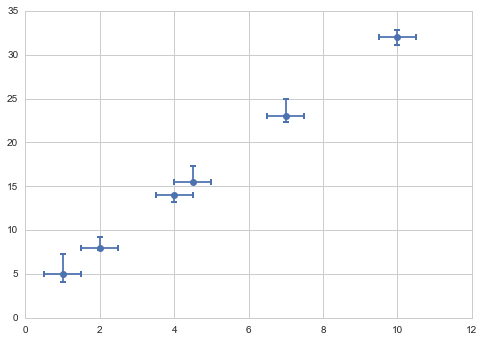

In [7]:
#create some random numbers to use for my error bars
#squre them to make sure they're positive
yerror_up = 2.5*np.random.random(size=len(x))**2
yerror_down = 2.5*np.random.random(size=len(x))**2

yerror = np.row_stack( (yerror_up, yerror_down) )

plt.errorbar(x,y, yerr=yerror, xerr=0.5, fmt='o', capthick=2) 
plt.show()

Ordinary Least-Squares (OLS) Regression with Measurement Error
====

We're going to return to regression again. This time with error in both our independent and dependent variables. Here is the list of cases we'll consider:

1. OLS with constant $y$ uncertainty in 1D
2. OLS with constant $x$ uncertainty in 1D
2. OLS with constant $x,y$ uncertainty in 1D
2. OLS with multiple $y$ values in N-dimensions

Case 1 -  OLS with constant $y$ uncertainty in 1D
===

In this case we have some constant extra uncertainty in $y$, so that when we measure $y$ we don't get the actual $y$. We get some estimate of $y$. For example, if I'm weighing out a powder and the balance is only accuarate to $2$mg, I don't get the true mass but isntead some estimate with an uncertainty of $2$ mg. That means our measurements for $y$ do not contain the *true* value of y, but are instead an estimate of $y$. We're doing regression and our equation looks like this for the *true* y values:

$$(y + \eta) = \alpha + \beta x + \epsilon$$

where $\eta$ is the extra uncertainty in $y$. We have measured $(y + \eta)$ and $x$ for our regression. 

We can rearrange the equation a little bit and get:

$$y = \alpha + \beta x + \epsilon_1$$

where $\epsilon_1 = \epsilon - \eta$. The $_1$ stands for case 1. Notice that since $\eta$ and $\epsilon$ are normally distributed and centered at $0$, we don't actually get a smaller error term for $\epsilon_1$ than $\epsilon$. Since we've arraived at the same equation as the usual OLS regression with a slope and intercept, we can use the same equations. EXCEPT, our standard error of $\epsilon_1$ is slightly different. The standard error is:

$$ S^2_{\epsilon_1} = S^2_{\epsilon} + \sigma_{\eta}^2 = \frac{\sum_i (y_i - \hat{y}_i)^2}{N - 2} + \sigma_{\eta}^2 $$

where $S^2_{\epsilon}$ was our previously used standard error term. The $-2$ term is for the reduction in degrees of freedom 

and $\sigma_{\eta}^2$ is the squared error in our measurement. Notice "error" here generally means an instrument's stated precision.

### All Equations for Case 1


$$\hat{\beta} = \frac{\sigma_{xy}}{\sigma_x^2}$$

$$\hat{\alpha} = \frac{1}{N - 2}\sum_i (y_i - \hat{\beta}x_i)$$

$$ S^2_{\epsilon_1} =\frac{SSR}{N-2} + \sigma_{\eta}^2 $$

$$SSR = \sum_i (y_i - \hat{\beta}x_i - \hat{\alpha})^2$$

$$S^2_{\alpha} = S^2_{\epsilon_1} \left[ \frac{1}{N - 2} + \frac{\bar{x}^2}{\sum_i\left(x_i - \bar{x}\right)^2}\right]$$

$$S^2_{\beta} = \frac{S^2_{\epsilon_1}}{\sum_i \left(x_i - \bar{x}\right)^2}$$


Case 1 Example 
---

The Gibbs equation for a chemical reaction is:

$$\Delta G = \Delta H - T \Delta S$$

where $\Delta G = -RT\ln Q$ and $Q$ the equilibrium constant. We can measure $\Delta G$ by measuring $Q$ and due to instrument precision, we know that the precision (generally 1 standard deviation) of $\Delta G$ is 2 kcal / mol. What is the change in entropy, given these measurements:

* $T \textrm{[K]}$ :300, 312, 325, 345, 355, 400

* $\Delta G \textrm{[kcal/mol]}$: 5.2, 2.9, 0.4, -4.2, -13

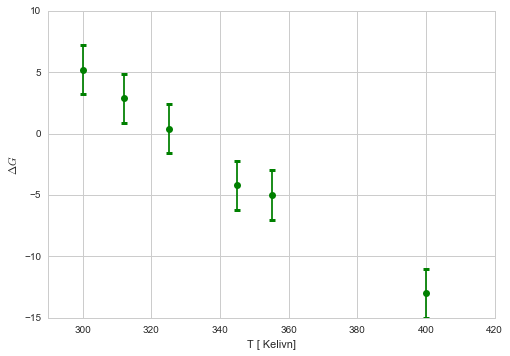

In [14]:
T = np.array([300., 312, 325, 345, 355, 400])
DG = np.array([5.2, 2.9, 0.4, -4.2,-5, -13])

plt.errorbar(T, DG, yerr=2, fmt='go', capthick=3)
plt.xlim(290, 420)
plt.xlabel('T [ Kelivn]')
plt.ylabel('$\Delta G$')
plt.show()

We can use our equations above to find the entropy, which is the negative of the slope:

In [16]:
cov_mat = np.cov(T, DG, ddof=1)
slope = cov_mat[0,1] / cov_mat[0,0]
DS = -slope
print(DS, 'kcal/mol*K')

0.182431281456 kcal/mol*K


Now if we want to give a confidence interval, we need to get the standard error first. Let's start by checking our fit and we'll need the residuals

59.6520867209


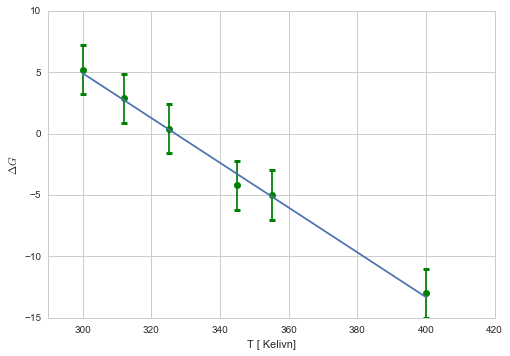

In [18]:
intercept = np.mean(DG - T * slope)
print(intercept)

plt.errorbar(T, DG, yerr=2, fmt='go', capthick=3)
plt.plot(T, T * slope + intercept, '-')
plt.xlim(290, 420)
plt.xlabel('T [ Kelivn]')
plt.ylabel('$\Delta G$')
plt.show()

In [19]:
residuals = DG - T * slope - intercept
sig_e = np.sum(residuals**2) / (len(T) - 2)
#this is where we include the error in measurement
sig_total = sig_e + 2.0 ** 2
s2_e = sig_total / len(T)
s2_slope = s2_e / (np.sum( (np.mean(T) - T)**2 ) )

Now we have the standard error in the slope, which is the same as entropy. Now we get our confidence interval

In [20]:
T = scipy.stats.t.ppf(0.975, len(T))
slope_ci = T * np.sqrt(s2_slope)

print(slope_ci)

0.0256689688465


Remember, the slope is the negative change in our entropy. So our final answer is

$$\Delta S = 0.18 \pm 0.025 \frac{\textrm{kcal}}{\textrm{mol}\cdot\textrm{K}}$$

Case 2 - OLS with constant $x$ uncertainty in 1D
====


Now we have a measurement error in our independent variables. Our $x$ values are just our best esimiates; we don't know the true $x$ values. Our model equation is:

$$y = \alpha + \beta(x + \eta) + \epsilon$$

where our measurements are $y$ and $(x + \eta)$. Once again we can rearrange our model equation into:

$$y = \alpha + \beta x + \epsilon_2$$

where $\epsilon_2 = \beta \eta + \epsilon$. Everything is the same as before, except that our extra variance term depends on the slope. That changes our standard error equation to:


$$ S^2_{\epsilon_2} =  \frac{SSR}{N} + \hat{\beta}^2\sigma_{\eta}^2 $$

and $\sigma_{\eta}^2$ is again the squared error in our measurement. Note that this is an approximate method.

###All Equations for Case 2


$$\hat{\beta} = \frac{\sigma_{xy}}{\sigma_x^2}$$

$$\hat{\alpha} = \frac{1}{N}\sum_i (y_i - \hat{\beta}x_i)$$


$$ S^2_{\epsilon_2} =  \frac{SSR}{N} + \hat{\beta}^2\sigma_{\eta}^2 $$


$$S^2_{\alpha} = S^2_{\epsilon_2} \left[ \frac{1}{N} + \frac{\bar{x}^2}{\sum_i\left(x_i - \bar{x}\right)^2}\right]$$

$$S^2_{\beta} = \frac{S^2_{\epsilon_2}}{\sum_i \left(x_i - \bar{x}\right)^2}$$


Case 2 - Example
---

Repeat the case 1 example, except with an error in temperature measurement of 5 K. 

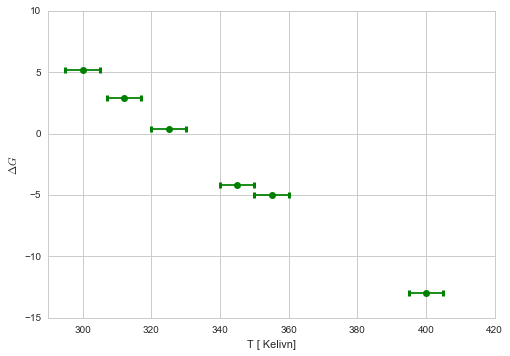

In [21]:
T = np.array([300., 312, 325, 345, 355, 400])
DG = np.array([5.2, 2.9, 0.4, -4.2,-5, -13])

plt.errorbar(T, DG, xerr=5, fmt='go', capthick=3)
plt.xlim(290, 420)
plt.xlabel('T [ Kelivn]')
plt.ylabel('$\Delta G$')
plt.show()

Our slope and intercept are unchanged, but our standard error is different. 

In [22]:
#Now we use the independent variable measurement error
s2_e = sig_e + slope**2 * 5.0 ** 2
s2_slope = s2_e / (np.sum( (np.mean(T) - T)**2 ) )
T = scipy.stats.t.ppf(0.975, len(T))
slope_ci = T * np.sqrt(s2_slope)

print(slope_ci)

0.0318754042333


With the new measurement error, our new confidence interval for entropy is:

$$\Delta S = 0.18 \pm 0.03 \frac{\textrm{kcal}}{\textrm{mol}\cdot\textrm{K}}$$

Case 2 - Attenuation Error
---

There is an interesting side effect of independent measurement error. Let's look at some plots showing increasing uncertainty in $x$, but always with a slope of 3

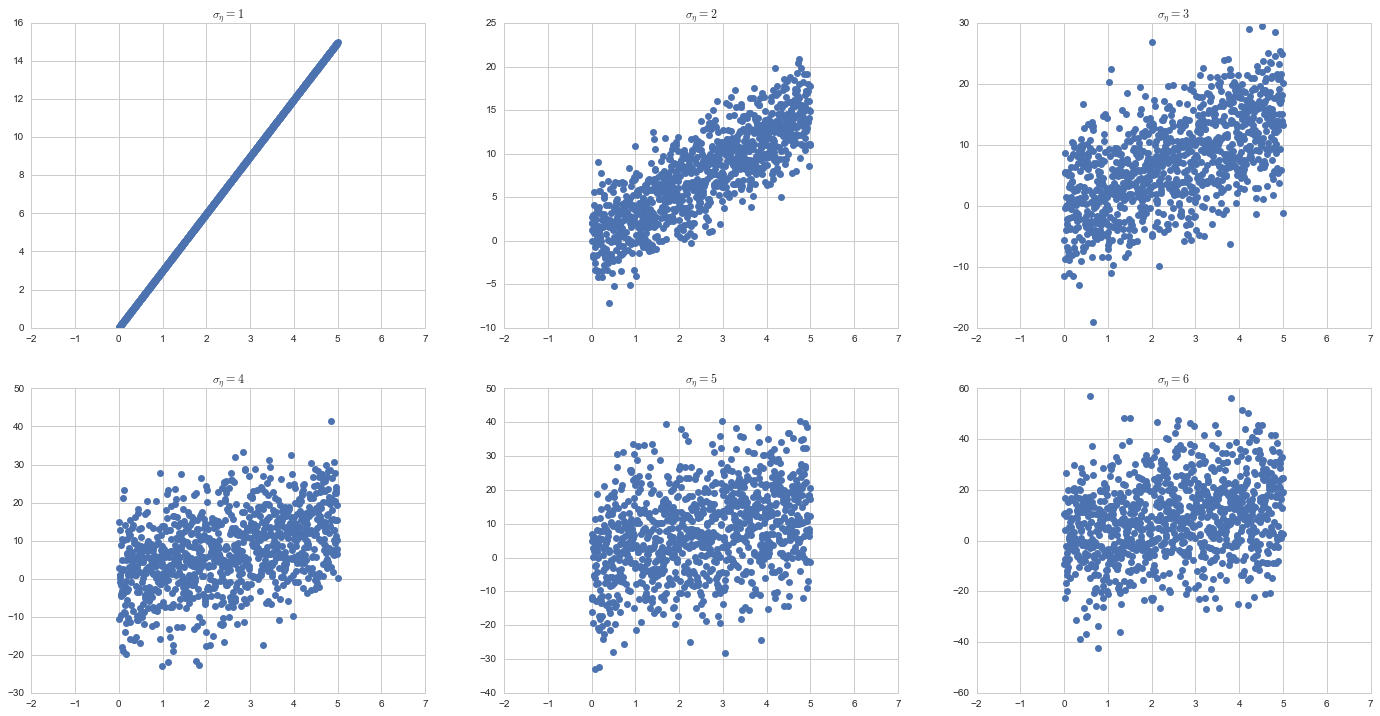

In [23]:
plt.figure(figsize=(24, 12))

rows = 2
cols = 3
N = 1000

for i in range(rows):
    for j in range(cols):
        index = i * cols + j + 1
        fig = plt.subplot(rows, cols, index)
        err = scipy.stats.norm.rvs(loc=0, scale = index - 1, size=N)
        x = np.linspace(0,5, N)
        y = 3 * (x + err)
        plt.plot(x, y, 'o')
        plt.xlim(-2, 7)
        plt.title('$\sigma_\eta = {}$'.format(index))
        
plt.show()

Notice that as our error in our measurement gets larger, the slope becomes less and less clear. This is called **Attenuation Error**. As uncertainty in $x$ increases, our estimates for $\alpha$ and $\beta$ get smaller. We usually don't correct for this, because all our hypothesis tests become *more* conservative due to attenuation and thus we won't ever accidentally think there is a correlation when there isn't. But be aware that when the uncertatinty in $x$ becomes simiar in size to our range of data, we will underestimate the slope.

Case 3 - OLS with constant x,y uncertainty in 1D
===

As you may have expected, the standard error in $\epsilon_3$ is just a combination of the previous two cases:

$$S^2_{\epsilon_3} = \frac{SSR}{N} + \hat{\beta}^2\sigma^2_{\eta_x} + \sigma^2_{\eta_y}$$

### All Equations for Case 3


$$\hat{\beta} = \frac{\sigma_{xy}}{\sigma_x^2}$$

$$\hat{\alpha} = \frac{1}{N}\sum_i (y_i - \hat{\beta}x_i)$$

$$S^2_{\epsilon_3} = \frac{SSR}{N - 2} + \hat{\beta}^2\sigma^2_{\eta_x} + \sigma^2_{\eta_y}$$

$$S^2_{\alpha} = S^2_{\epsilon_3} \left[ \frac{1}{N - 2} + \frac{\bar{x}^2}{\sum_i\left(x_i - \bar{x}\right)^2}\right]$$

$$S^2_{\beta} = \frac{S^2_{\epsilon_3}}{\sum_i \left(x_i - \bar{x}\right)^2}$$


Case 3 - Example
----

Repeat the Case 1 example with an uncertainty in $\Delta G$ of 2 kcal/mol and $T$ of 5K

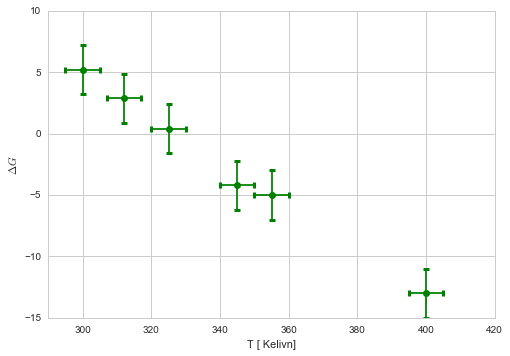

In [24]:
temperature = np.array([300., 312, 325, 345, 355, 400])
DG = np.array([5.2, 2.9, 0.4, -4.2,-5, -13])

plt.errorbar(temperature, DG, xerr=5, yerr=2, fmt='go', capthick=3)
plt.xlim(290, 420)
plt.xlabel('T [ Kelivn]')
plt.ylabel('$\Delta G$')
plt.show()

0.182431281456 kcal/mol*K
59.6520867209


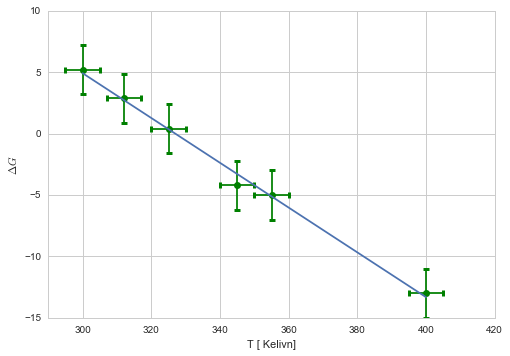

In [26]:
cov_mat = np.cov(temperature, DG, ddof=1)
slope = cov_mat[0,1] / cov_mat[0,0]
DS = -slope
print(DS, 'kcal/mol*K')
intercept = np.mean(DG - temperature * slope)
print(intercept)

plt.errorbar(temperature, DG, xerr=5, yerr=2, fmt='go', capthick=3)
plt.plot(temperature, temperature * slope + intercept, '-')
plt.xlim(290, 420)
plt.xlabel('T [ Kelivn]')
plt.ylabel('$\Delta G$')
plt.show()

In [27]:
residuals = DG - temperature * slope - intercept
sig_e = np.sum(residuals**2)

#The only new part
#-------------------------------------
#Now we use both the dependent and the independent variable measurement error
sig_total = sig_e + slope**2 * 5.0 ** 2 + 2.0**2
#-------------------------------------


s2_e = sig_total / len(temperature)
s2_slope = s2_e / (np.sum( (np.mean(temperature) - temperature)**2 ) )
T = scipy.stats.t.ppf(0.975, len(temperature))
slope_ci = T * np.sqrt(s2_slope)

print(slope_ci)

0.0301623082319


With the both measurement errors, our confidence interval for entropy is:

$$\Delta S = 0.18 \pm 0.03 \frac{\textrm{kcal}}{\textrm{mol}\cdot\textrm{K}}$$

which is a slightly larger confidence interval than for case 1

Case 4 - OLS with multiple y values in N-dimensions
===

Sometimes you'll see people have multiple measurements for each $y$-value so that they can plot error bars. For example, let's say we have 3 $x$-values and we have 4 $y$-vaules at each $x$-value. That would give enough samples so that we can compute a standard error at each $y$-value:

$$S_y = \sqrt{\frac{\sigma_y^2}{N}}$$

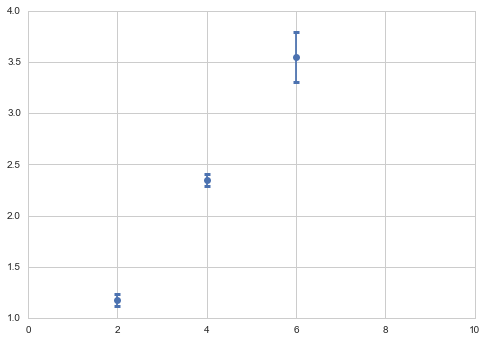

In [28]:
x = np.array([2, 4, 6])

y_1 = np.array([1.2, 1.5, 1.1, 0.9])
y_2 = np.array([2.6, 2.2, 2.1, 2.5])
y_3 = np.array([3.0, 2.9, 3.3, 5])

y = np.array([np.mean(y_1), np.mean(y_2), np.mean(y_3)])
#compute standard error
yerr = np.sqrt(np.array([np.var(y_1, ddof=1), np.var(y_2, ddof=1), np.var(y_3, ddof=1)])) / 4.0

plt.errorbar(x, y, yerr=yerr, fmt='o', capthick=3)
plt.xlim(0, 10)
plt.show()

How would we do regression on this? Well, it turns out you don't do anything special. You just treat the 12 $y$-values as equivalent and use the normal regression equations. I know this seems obvious, but it's a common question.